# Work on Moliere : l'Avare

## Objectives

- Classez les personnages selon la quantité de parole grâce à une analyse syntaxique du texte (scènes / répliques / mots). En particulier, quel est celui qui parle le plus ? Quel est celui qui ne parle pas du tout ? Attention, les noms des personnages ne sont pas forcément homogènes (casse et accents par exemple).
- Réalisez un graphique qui montrera le nombre de mots que chaque acteur prononce dans chaque scène. Pour cela, vous pouvez vous inspirer de l'étude de l'Avare de Molière réalisée par l'OBVIL (graphe de gauche). Dans ce graphique, les lignes sont de longueur égale et la hauteur représente le nombre de mots prononcés au total dans la scène. La largeur de chaque rectangle indique le pourcentage de la scène qu’un acteur occupe.
- Facultatif : Construisez un graphe d’interlocution permettant de visualiser les échanges entre les personnages. Pour cela, vous pouvez vous inspirer de l'étude de l'Avare de Molière réalisée par l'OBVIL (graphe de droite).
- Déposer votre résultat dans FUN

## Get the data from the files

In [1]:
import xml.etree.ElementTree as ET
import pickle as pkl
import pandas as pd

In [2]:
prefix = "{http://www.tei-c.org/ns/1.0}"

tree = ET.parse("data/moliere_avare.xml")
root = tree.getroot()
            
current_act = 1
current_scene = 1
current_speaker = ""

d_act_scene_speaker_sent = {}

          
for act in root.findall(prefix+'text/'+prefix+'body/'+prefix+'div1'):
    current_act = act.get("n")
    if current_act not in d_act_scene_speaker_sent.keys():
        d_act_scene_speaker_sent[current_act] = {}
    
    for scene in act.findall(prefix+'div2'):
        current_scene = scene.get("n")
        if current_scene not in d_act_scene_speaker_sent[current_act].keys():
            d_act_scene_speaker_sent[current_act][current_scene] = {}
        
        for speaker in scene.findall(prefix+'sp'):
            current_speaker = speaker.get("who")
            if current_speaker not in d_act_scene_speaker_sent[current_act][current_scene].keys():
                d_act_scene_speaker_sent[current_act][current_scene][current_speaker] = []
                
            
            for sent in speaker.findall(prefix+'p/'+prefix+'s'):
                sentence = sent.text
                d_act_scene_speaker_sent[current_act][current_scene][current_speaker].append(sentence)

Here are all the sentences pronunced by Cleante during act I scene 4 :

In [ ]:
d_act_scene_speaker_sent["1"]["4"]["cleante"]

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Morgane\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:

# create dataframe 
# character , nb_scene , nb sent, nb word

d_speaker = {}
for act in d_act_scene_speaker_sent.keys():
    for scene in d_act_scene_speaker_sent[act].keys():
        for speaker in d_act_scene_speaker_sent[act][scene].keys():
            # to get nb of scene
            if speaker not in d_speaker.keys():
                d_speaker[speaker] = [0,0,0]

            d_speaker[speaker][0] += 1
                
            # to get nb of sentences
            d_speaker[speaker][1] += len(d_act_scene_speaker_sent[act][scene][speaker])
            
            # to get nb of words
            for sent in d_act_scene_speaker_sent[act][scene][speaker]:
                tab_word = (nltk.word_tokenize(sent))
                print(tab_word)
                d_speaker[speaker][2] += len(tab_word)

['Hé', 'quoi', ',', 'charmante', 'Élise', ',', 'vous', 'devenez', 'mélancolique', ',', 'après', 'les', 'obligeantes', 'assurances', 'que', 'vous', 'avez', 'eu', 'la', 'bonté', 'de', 'me', 'donner', 'de', 'votre', 'foi', '?']
['Je', 'vous', 'vois', 'soupirer', ',', 'hélas', ',', 'au', 'milieu', 'de', 'ma', 'joie', '!']
['Est-ce', 'du', 'regret', ',', 'dites-moi', ',', 'de', "m'avoir", 'fait', 'heureux', '?', 'et', 'vous', 'repentez-vous', 'de', 'cet', 'engagement', 'où', 'mes', 'feux', 'ont', 'pu', 'vous', 'contraindre', '?']
['Hé', 'que', 'pouvez-vous', 'craindre', ',', 'Élise', ',', 'dans', 'les', 'bontés', 'que', 'vous', 'avez', 'pour', 'moi', '?']
['Ah', '!', 'ne', 'me', 'faites', 'pas', 'ce', 'tort', ',', 'de', 'juger', 'de', 'moi', 'par', 'les', 'autres', '.']
['Soupçonnez-moi', 'de', 'tout', ',', 'Élise', ',', 'plutôt', 'que', 'de', 'manquer', 'à', 'ce', 'que', 'je', 'vous', 'dois', '.']
['Je', 'vous', 'aime', 'trop', 'pour', 'cela', ';', 'et', 'mon', 'amour', 'pour', 'vous', ','

TypeError: expected string or bytes-like object

In [ ]:
d_speaker

In [5]:
l_data = []
for speaker,data in d_speaker.items():
    l_data.append([speaker,data[0],data[1],data[2]])

In [6]:
l_data
df = pd.DataFrame(l_data)
df.columns = ["speaker", "nb_scene", "nb_replica", "nb_word"]

In [7]:
df

,speaker,nb_scene,nb_replica,nb_word
0,valere,2,68,1349
1,elise,3,50,889
2,cleante,2,54,1064
3,harpagon,3,160,2032
4,la-fleche,1,36,289


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x17bf6d5a548>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

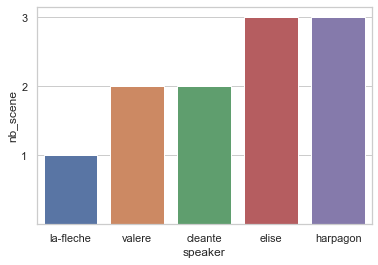

In [9]:
# speaker / nb_scene
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="speaker", y="nb_scene", data=df, order=df.sort_values('nb_scene').speaker)

plt.yticks(range(min(df["nb_scene"]),max(df["nb_scene"])+1))

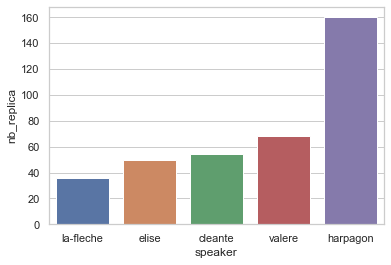

In [10]:
# speaker / nb_replica
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="speaker", y="nb_replica", data=df, order=df.sort_values('nb_replica').speaker)

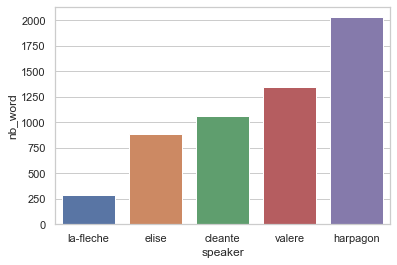

In [11]:
# speaker / nb_word
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="speaker", y="nb_word", data=df, order=df.sort_values('nb_word').speaker)

### nb_word/scene/speaker

In [14]:
d_speaker = {}
for act in d_act_scene_speaker_sent.keys():
    for scene in d_act_scene_speaker_sent[act].keys():
        for speaker in d_act_scene_speaker_sent[act][scene].keys():
            # to get nb of scene
            if speaker not in d_speaker.keys():
                d_speaker[speaker] = {}
                
            if scene not in d_speaker[speaker].keys():
                d_speaker[speaker][scene] = 0
            
            # to get nb of words
            for sent in d_act_scene_speaker_sent[act][scene][speaker]:
                tab_word = (nltk.word_tokenize(sent))
                print(tab_word)
                d_speaker[speaker][scene] += len(tab_word)

['Hé', 'quoi', ',', 'charmante', 'Élise', ',', 'vous', 'devenez', 'mélancolique', ',', 'après', 'les', 'obligeantes', 'assurances', 'que', 'vous', 'avez', 'eu', 'la', 'bonté', 'de', 'me', 'donner', 'de', 'votre', 'foi', '?']
['Je', 'vous', 'vois', 'soupirer', ',', 'hélas', ',', 'au', 'milieu', 'de', 'ma', 'joie', '!']
['Est-ce', 'du', 'regret', ',', 'dites-moi', ',', 'de', "m'avoir", 'fait', 'heureux', '?', 'et', 'vous', 'repentez-vous', 'de', 'cet', 'engagement', 'où', 'mes', 'feux', 'ont', 'pu', 'vous', 'contraindre', '?']
['Hé', 'que', 'pouvez-vous', 'craindre', ',', 'Élise', ',', 'dans', 'les', 'bontés', 'que', 'vous', 'avez', 'pour', 'moi', '?']
['Ah', '!', 'ne', 'me', 'faites', 'pas', 'ce', 'tort', ',', 'de', 'juger', 'de', 'moi', 'par', 'les', 'autres', '.']
['Soupçonnez-moi', 'de', 'tout', ',', 'Élise', ',', 'plutôt', 'que', 'de', 'manquer', 'à', 'ce', 'que', 'je', 'vous', 'dois', '.']
['Je', 'vous', 'aime', 'trop', 'pour', 'cela', ';', 'et', 'mon', 'amour', 'pour', 'vous', ','

TypeError: expected string or bytes-like object

In [16]:
l_data2 = []
for speaker in d_speaker.keys():
    for scene in d_speaker[speaker].keys():
        l_data2.append([speaker,scene,d_speaker[speaker][scene]])
    
df = pd.DataFrame(l_data2)
df.columns = ["speaker", "scene", "nb_word"]

In [15]:
d_speaker

{'valere': {'1': 692, '5': 657},
 'elise': {'1': 531, '2': 173, '4': 185},
 'cleante': {'2': 813, '4': 251},
 'harpagon': {'3': 493, '4': 1238, '5': 301},
 'la-fleche': {'3': 289}}

In [17]:
l_data2

[['valere', '1', 692],
 ['valere', '5', 657],
 ['elise', '1', 531],
 ['elise', '2', 173],
 ['elise', '4', 185],
 ['cleante', '2', 813],
 ['cleante', '4', 251],
 ['harpagon', '3', 493],
 ['harpagon', '4', 1238],
 ['harpagon', '5', 301],
 ['la-fleche', '3', 289]]

In [24]:
df = df.sort_values(by = ['scene'], ascending = [True])

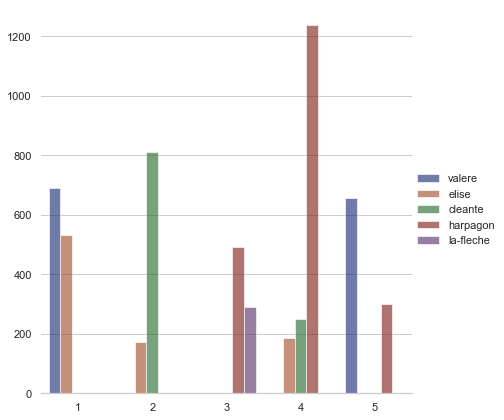

In [25]:
g = sns.catplot(
    data=df, kind="bar",
    x="scene", y="nb_word", hue="speaker",
    ci="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("", "")
g.legend.set_title("")